In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
road = pd.read_csv('Road-Denmark/road.data',names=['RoadId','Longitude','Latitude','Altitude'])
road.head()

,RoadId,Longitude,Latitude,Altitude
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [3]:
road.describe()

,RoadId,Longitude,Latitude,Altitude
count,4.348740e+05,434874.000000,434874.000000,434874.000000
mean,9.786998e+07,9.731836,57.083758,22.185405
std,3.775233e+07,0.627349,0.289479,18.617989
min,4.482444e+06,8.146126,56.582486,-8.608184
25%,8.267897e+07,9.337649,56.846049,7.028053
50%,1.019797e+08,9.887195,57.042498,17.574678
75%,1.259547e+08,10.172359,57.308669,31.810224
max,1.577424e+08,11.199326,57.750511,134.441947


In [4]:
np.any(road.isnull())

False

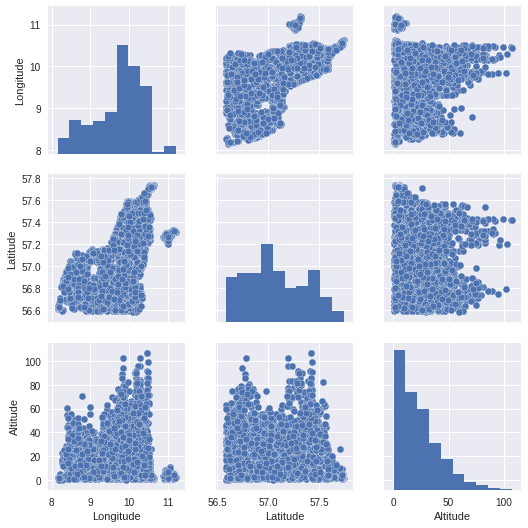

In [6]:
%matplotlib inline
sb.pairplot(road.iloc[:,1:].sample(n=3000,axis=0))

In [7]:
def averageDistToCenter(X,C):
    avdist = np.sum(np.sqrt(np.sum((X - C)**2,axis=0)),axis=0)
    avdist /= np.maximum(np.size(X,axis=1),1)
    return avdist

def KMeans(K, X, doPrinting=False):
    d = np.size(X,axis=0)
    N = np.size(X,axis=1)
    I = np.eye(K)
    R = X[:,np.random.randint(0,N,K)] #random start centers
    M = np.zeros((d,K)).astype(int)
    changes = True
    iters = 0
    while changes:
#         D = np.sum((R.T[np.newaxis,:,:] - X.T[:,np.newaxis,:])**2., axis=-1).T # distances from centers
        D = -2. * np.dot(X.T,R) + np.sum(R**2,axis=0,keepdims=True)# it is not necessary to add X^2
        m = np.argmin(D, axis=1)
        newM = np.take(I,m,axis=0).astype(int) # matrix of membership
        changes = not np.array_equal(M,newM)
        M = newM
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1) # new centers
        iters +=1
    if doPrinting:
        avDistToCenter = np.array([averageDistToCenter(X[:,M[:,i] == 1], R[:,i,np.newaxis]) for i in range(K)])
        groupSizes = np.sum(M.T,axis=1)
        print('Average distance to center within groups:\n',avDistToCenter)
        print("Iterations: ", iters, "\n")
        print("Group sizes: ", groupSizes, "\n")
    return R, M, m, groupSizes

In [8]:
roadData = road.iloc[:,1:].values.T
K = 10
R, M, m, groupSizes = KMeans(K, roadData, doPrinting=True)

Average distance to center within groups:
 [ 1.84167991  1.75348608  2.57207791  1.64175759  3.1089238   2.00391703
  3.8079278   1.87182383  2.2690932   6.39961581]
Iterations:  528 

Group sizes:  [ 60669  69108  28131 102194  18699  49984  12138  53341  36325   4285] 



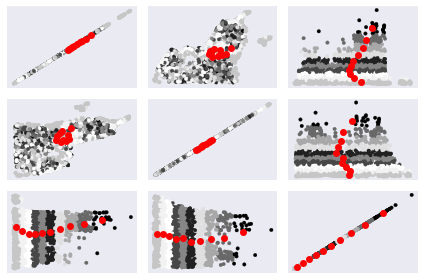

In [12]:
d = roadData.shape[0]
sample = np.random.randint(0,roadData.shape[1],3000)
for i in range(d):
    for j in range(d):
        plt.subplot(d, d, i*d+j+1)
        plt.scatter(roadData[i, sample], roadData[j, sample], c=m[sample], marker='.')
        plt.plot(R[i,:], R[j,:], 'ro')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

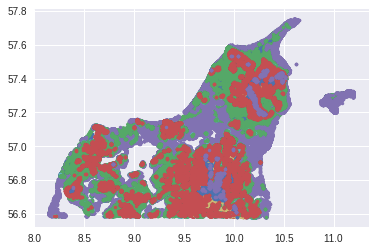

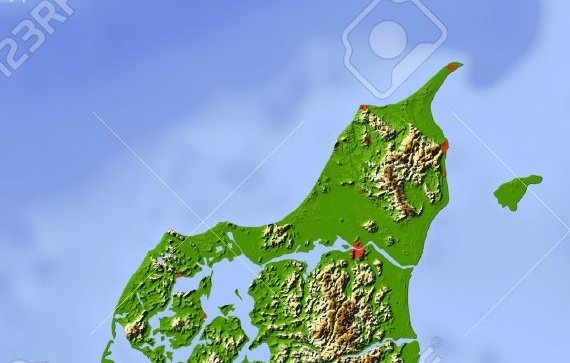

In [28]:
for i in range(K):
    plt.plot(roadData[0, m == i], roadData[1, m == i],'.')
plt.show()
from IPython.display import Image
from IPython.display import display
Image('Road-Denmark/Jutland.jpg')

In [29]:
K = 20
R, M, m, groupSizes = KMeans(K, roadData, doPrinting=True)

Average distance to center within groups:
 [ 1.1564449   1.34813734  4.89526758  1.51492377  1.13771125  1.28263422
  1.07285058  1.21862991  1.68986822  1.0326895   1.94376174  1.06202952
  2.31519813  1.12110808  1.843869    3.06728383  1.41058168  1.07104254
  1.11801613  1.1356718 ]
Iterations:  937 

Group sizes:  [30284 16499   632 12810 25818 19252 34617 23047  9790 48292  6141 55667
  3840 26944  8090  2168 14950 36294 31398 28341] 



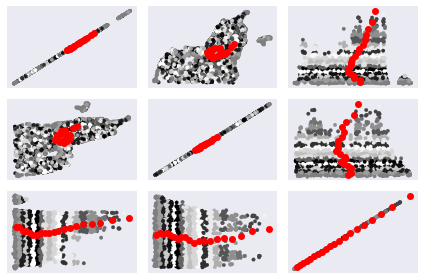

In [30]:
d = roadData.shape[0]
sample = np.random.randint(0,roadData.shape[1],3000)
for i in range(d):
    for j in range(d):
        plt.subplot(d, d, i*d+j+1)
        plt.scatter(roadData[i, sample], roadData[j, sample], c=m[sample], marker='.')
        plt.plot(R[i,:], R[j,:], 'ro')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

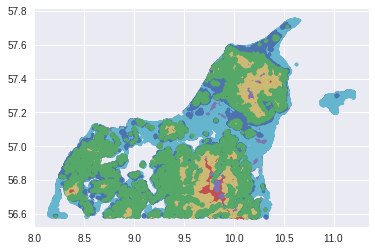

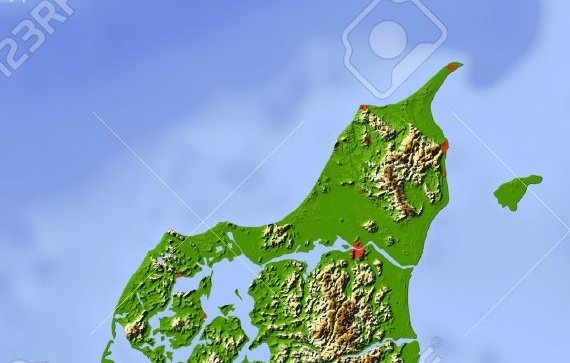

In [32]:
for i in range(K):
    plt.plot(roadData[0, m == i], roadData[1, m == i],'.')
plt.show()
Image('Road-Denmark/Jutland.jpg')

In [33]:
normRoadData = (roadData - np.min(roadData, axis=1, keepdims=True)) / (np.max(roadData, axis=1, keepdims=True) - np.min(roadData, axis=1, keepdims=True))
K = 10
R, M, m, groupSizes = KMeans(K, normRoadData, doPrinting=True)

Average distance to center within groups:
 [ 0.12392124  0.10154823  0.12349857  0.13823082  0.11033627  0.12429612
  0.12972158  0.1169878   0.11299228  0.13892773]
Iterations:  70 

Group sizes:  [32021 78482 42751 53951 37422 43677 27019 56670 23299 39582] 



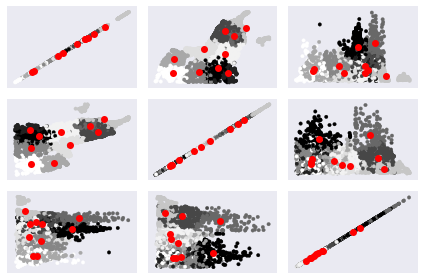

In [34]:
d = normRoadData.shape[0]
sample = np.random.randint(0,normRoadData.shape[1],3000)
for i in range(d):
    for j in range(d):
        plt.subplot(d, d, i*d+j+1)
        plt.scatter(normRoadData[i, sample], normRoadData[j, sample], c=m[sample], marker='.')
        plt.plot(R[i,:], R[j,:], 'ro')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()

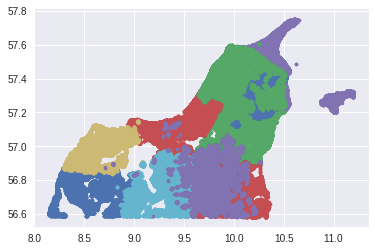

In [35]:
for i in range(K):
    plt.plot(roadData[0, m == i], roadData[1, m == i],'.')
plt.show()